In [ ]:
# to delete, moved to requirement.txt
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Extraction des données

In [ ]:
source = DataSource("./../data.json")
dataframe_list = source.filter([["WC"], ["M"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)
    # print(athlete,":") # noqa: ERA001
    # print(f"   ski_points: {athletes_data[athlete]["ski_points"]["raw"]["mean"]}")  # noqa: ERA001
    # print(f"   air_points: {athletes_data[athlete]["air_points"]["raw"]["mean"]}") # noqa: ERA001
    # print(f"   time_points: {athletes_data[athlete]["time_points"]["raw"]["mean"]}") # noqa: ERA001

len(athletes_data)

                   ski_deduction_judge1  ski_judge1  total_points country  \
HORISHIMA Ikuma                    -0.2        17.9         83.58     JPN   
CAVET Benjamin                     -0.1        17.0         82.57     FRA   
KINGSBURY Mikael                   -0.2        17.5         82.47     CAN   
GRAHAM Matt                        -0.3        16.9         81.70     AUS   
FJALLSTROM Ludvig                  -0.2        17.0         81.67     SWE   
...                                 ...         ...           ...     ...   
GAJDECKA Marek                     -0.7        13.8         52.96     CZE   
MATHESON James                    -11.7        14.0         40.98     AUS   
BUZZI Enea                        -11.2        15.2         21.33     SUI   
LI Musai                          -11.5        12.0         17.15     CHN   
MATSUDA So                        -15.6        14.0         14.50     JPN   

                   bottom_air_judge1  bottom_air_judge2 bottom_air_trick  \

126

# Création d'un DataFrame utilisable pour le clustering

In [4]:
data = []
athlete_names = []

for athlete, attributes in athletes_data.items():
    athlete_names.append(athlete)
    data.append([attributes["ski_points"]["raw"]["mean"], attributes["air_points"]["raw"]["mean"], attributes["time_points"]["raw"]["mean"]])

df_athletes = pd.DataFrame(data, columns=["ski_points", "air_points", "time_points"], index=athlete_names)

df_athletes

,ski_points,air_points,time_points
CHEN Kang,38.520000,11.202000,11.920000
CAVET Benjamin,44.971429,12.749048,16.338095
WEESE Nicolas,22.357143,9.461429,14.538571
KANNO Shugo,25.050000,8.077500,13.565000
CHUNLAUD Kerrian,41.885714,12.357143,14.577143
...,...,...,...
MOUILLE Thibaud,38.211765,13.099412,13.251176
CAYOLLE Tristan,17.511111,7.961111,12.956667
ZHAO Yang,32.733333,9.646667,11.266667
BONDAREV Anton,28.287500,8.499375,13.440000


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

Text(0, 0.5, 'Cour du modele (Inertia)')

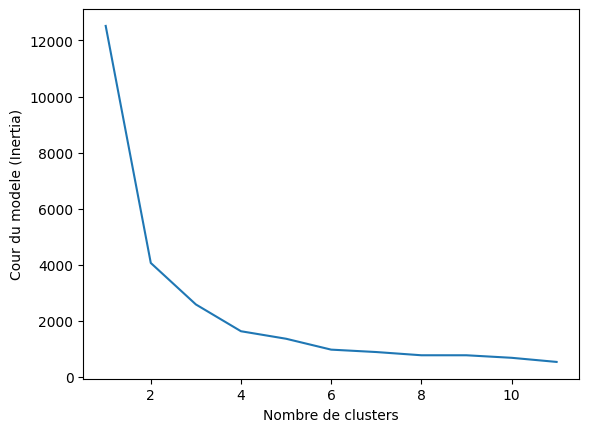

In [5]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")

# Nettoyage des données (enlever anomalies)

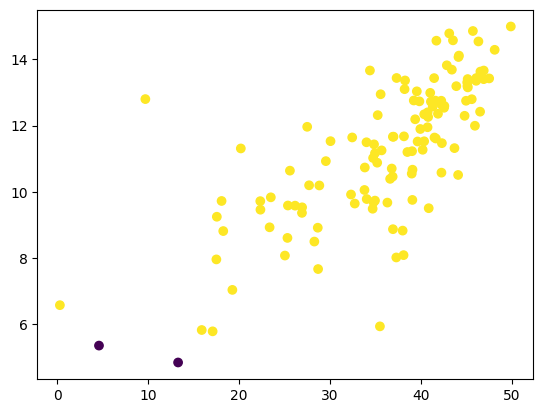

In [6]:
clean_model = IsolationForest(contamination=0.01)
clean_model.fit(df_athletes)
plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))

# Clustering sur les données

In [7]:
model = KMeans(n_clusters=3)
model.fit(df_athletes)
model.predict(df_athletes)
model.cluster_centers_

array([[14.31613426,  7.94271065, 11.33775   ],
       [41.7602743 , 12.31220442, 14.79345797],
       [30.30197653, 10.04141359, 13.10478437]])

/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/pytho

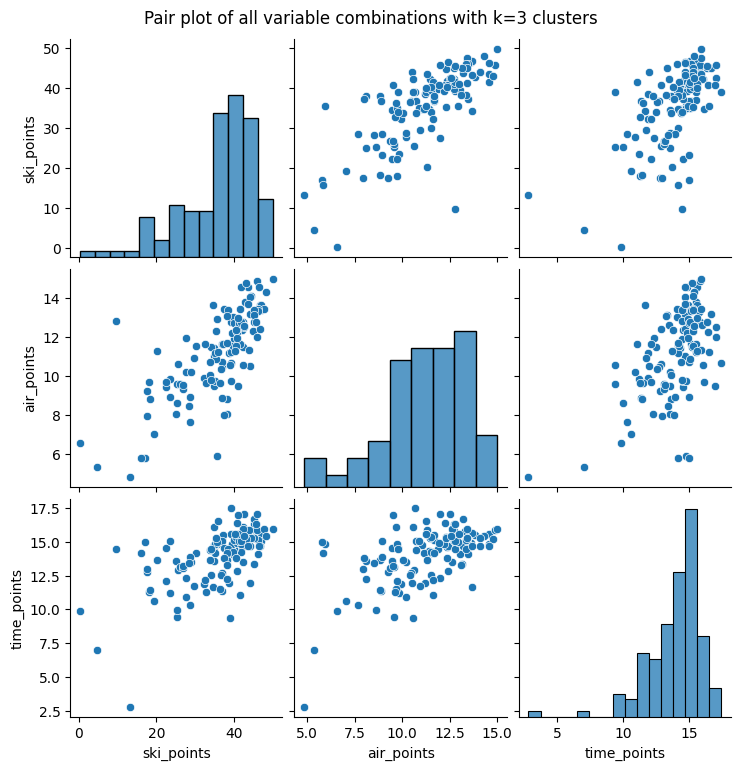

In [8]:
sns.pairplot(df_athletes, palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

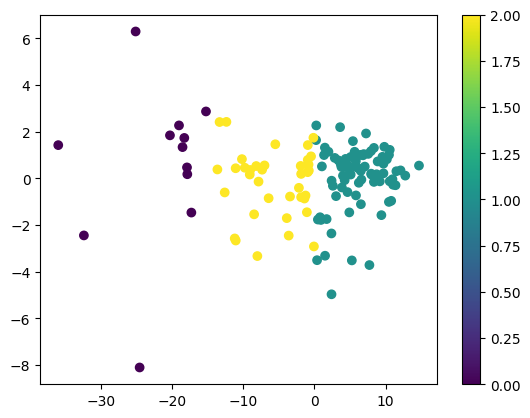

In [9]:
reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes)
plt.scatter(athletes_reduced[:, 0], athletes_reduced[:, 1], c=model.predict(df_athletes))  # Pas sur du c=...
plt.colorbar()

In [10]:
reduct_model.components_

array([[ 0.97584112,  0.17031377,  0.13684786],
       [-0.19797727,  0.4243906 ,  0.88357095]])